In [ ]:
from hype.graph import eval_reconstruction, load_adjacency_matrix
import argparse
import numpy as np
import torch
import os
import timeit
from hype import MANIFOLDS, MODELS


In [ ]:
np.random.seed(42)
filename = 'mammals.pth.best'
num_worker = 2

chkpnt = torch.load(filename)
dset = chkpnt['conf']['dset']
if not os.path.exists(dset):
    raise ValueError("Can't find dset!")

format = 'hd5f' if dset.endswith('.h5') else 'csv' 
dset = load_adjacency_matrix(dset, format, objects=chkpnt['objects'])

sample_size = len(dset['ids'])
sample = np.random.choice(len(dset['ids']), size=sample_size, replace=False)


In [ ]:
adj = {}

for i in sample:
    end = dset['offsets'][i + 1] if i + 1 < len(dset['offsets']) \
        else len(dset['neighbors'])
    adj[dset['ids'][i]] = set(dset['neighbors'][dset['offsets'][i]:end])
manifold = MANIFOLDS[chkpnt['conf']['manifold']]()

In [ ]:
manifold = MANIFOLDS[chkpnt['conf']['manifold']]()
model = MODELS[chkpnt['conf']['model']](
    manifold,
    dim=chkpnt['conf']['dim'],
    size=chkpnt['embeddings'].size(0),
    sparse=chkpnt['conf']['sparse']
)
model.load_state_dict(chkpnt['model'])

lt = chkpnt['embeddings']
if not isinstance(lt, torch.Tensor):
    lt = torch.from_numpy(llt).cuda()

In [ ]:
tstart = timeit.default_timer()
meanrank, maprank = eval_reconstruction(adj, model, workers=num_worker, progress=True)
etime = timeit.default_timer() - tstart

print(f'Mean rank: {meanrank}, mAP rank: {maprank}, time: {etime}')


In [ ]:
# aaa = lt(torch.Tensor[sample_size, chkpnt['conf']['dim']])
chdim = chkpnt['conf']['dim']
print(lt[0, :])

In [ ]:
import pandas

emb_data = lt.numpy()
df = pandas.DataFrame(emb_data)
df.loc[:, 'object'] = pandas.Series(dset['objects']['obj'], index=df.index)

cols = df.columns.tolist()
cols_modified = cols[-1:] + cols[:-1]


df = df[cols_modified]
df.to_csv("mammals_coord.csv", index=False)



In [ ]:
print(df.shape)
print(len(df.index))

print(df.columns)
display(df)

print(dset.keys())
print(dset['objects'])
print(dset['objects']['obj'])
print(df.index)

df.loc[:, 'object'] = pandas.Series(dset['objects']['obj'], index=df.index)

display(df)

In [ ]:
emb_data


In [ ]:
dset['objects']['obj']

In [ ]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]


df = df[cols]
display(df)

In [ ]:
testname = 'mammals.pth.best'

sp_name = testname.split('.', 1)
print(sp_name[0])

my_fname = sp_name[0] + '.csv'
print(my_fname)

In [ ]:
import matplotlib.pyplot as plt

# def plot_embedding2D(embedding_dict: dict, label_frac: float=0.001, plot_frac: float=0.6, title: str=None, save_fig: bool=False) -> None:
#     colors = ['b', 'g', 'r', 'y', 'm', 'c', 'k', 'w']
#     fig = plt.figure(figsize=(9, 9))
#     plt.grid('off')
#     plt.xlim([-1.2, 1.2])
#     plt.ylim([-1.2, 1.2])
#     plt.axis('off')
#     ax = plt.gca()

#     embed_vals = np.array(list(embedding_dict.values()))
#     keys = list(embedding_dict.keys())  # [node, x, y]

#     min_dist_2 = label_frac * max(embed_vals.max(axis=0) - embed_vals.min(axis=0)) ** 2
#     labeled_vals = np.array([2*embed_vals.max(axis=0)])
#     groups = [keys[i] for i in np.argsort(np.linalg.norm(embed_vals, axis=1))][:10]
#     groups.insert(0, 'mammal.n.01')

    



In [ ]:
import pandas 
import numpy as np

emb_data2 = pandas.read_table('./mammals2D.csv', delimiter=',')
emb_data2.columns = ['node', 'x', 'y']

if emb_data2.dtypes['node'] != np.number:
    try:
        emb_data2 = emb_data2.loc[(emb_data2.node.apply(lambda x: x not in ['u', 'v'])), :]     # what does it mean?
        # emb_data2['node'] = emb_data2.node.astype('int')
        emb_data2 = emb_data2.sort_values(by='node').reset_index(drop=True)     # why does it sort?
    except ValueError as e:
        pass

display(emb_data2)


In [ ]:
label_frac = 0.001
plot_frac = 0.6
title = None
save_fig = False

colors = ['b', 'g', 'r', 'y', 'm', 'c', 'k', 'w']
fig = plt.figure(figsize=(9, 9))
plt.grid('off')
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.axis('off')
ax = plt.gca()



In [ ]:
# table to dict form
emb_data3 = np.array(emb_data2.iloc[:, 1:3])
display(emb_data3)

my_dict = {}
my_mammals = emb_data2['node'].values
display(my_mammals)
for i in range(emb_data2.shape[0]):
    my_dict[my_mammals[i]] = emb_data3[i]


## for fitting clusters
# here, we don't have any cluster.
my_label_dict = {}
for i in range(emb_data2.shape[0]):
    my_label_dict[my_mammals[i]] = 0
# display(my_label_dict)


In [ ]:
embed_vals = np.array(list(my_dict.values()))
keys = list(my_dict.keys())  # [node, x, y]

label_frac = 0.001
min_dist_2 = label_frac * max(embed_vals.max(axis=0) - embed_vals.min(axis=0)) ** 2
print("min_dist_2: ", min_dist_2)
labeled_vals = np.array([2*embed_vals.max(axis=0)])
# embed_vals의 distance가 가장 작은 값들 --> higher hierarchy

from hype import MANIFOLDS
import torch as th

manifold = MANIFOLDS['poincare']()
groups = [keys[i] for i in np.argsort(manifold.distance(th.Tensor(np.array([0, 0])), th.Tensor(embed_vals)).numpy())][:10]

groups.insert(0, 'mammal.n.01')     # mammal 이 가장 높은 hierarchy 이길 바라지만, embedding 결과는 조금 다름.
manifold_Eu = MANIFOLDS['euclidean']()


fig = plt.figure(figsize=(9, 9))
plt.grid('off')
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.axis('off')
ax = plt.gca()

# plot some higher hierarchy first.
for key in groups:
    # skip drawing if the point is too close to the already plotted points.
    if np.min(manifold_Eu.distance(th.Tensor(my_dict[key]), th.Tensor(labeled_vals)).numpy()) < min_dist_2:
        continue
    else:
        _ = ax.scatter(my_dict[key][0], my_dict[key][1], s=40, c=colors[my_label_dict[key]])
        props = dict(boxstyle='round', lw=2, edgecolor='black', alpha=0.5)
        _ = ax.text(my_dict[key][0], my_dict[key][1]+0.01, s=key.split('.')[0], 
                        fontsize=12, verticalalignment='top', bbox=props)
        labeled_vals = np.vstack((labeled_vals, my_dict[key]))

# plot lower hierarchy points
n = int(plot_frac*len(embed_vals))  # plot 'n' randomly chosen data
for i in np.random.permutation(len(embed_vals))[:n]:
    # plot data points
    _ = ax.scatter(embed_vals[i][0], embed_vals[i][1], s=40, c=colors[my_label_dict[keys[i]]])
    # choose whether drawing a label or not.
    if np.min(manifold_Eu.distance(th.Tensor(embed_vals[i]), th.Tensor(labeled_vals)).numpy()) < min_dist_2:
        continue
    else:
        _ = ax.text(embed_vals[i][0], embed_vals[i][1]+0.02, s=keys[i].split('.')[0],
                    fontsize=11, verticalalignment='top', bbox=props)
        labeled_vals = np.vstack((labeled_vals, embed_vals[i]))

if title != None:
    plt.title(title, size=16)
if save_fig:
    plt.savefig('./images/plot_embedding.png')
plt.show()

In [ ]:
# display(groups)

In [ ]:
group_vals = [my_dict[groups[i]] for i in range(len(groups))]
display(group_vals)

In [ ]:
th.cuda.is_available()

In [ ]:
display(emb_data2.columns)
# emb_data2.columns[0] = ['obj']
emb_data2.rename(columns={emb_data2.columns[0]:'node'}, inplace=True)
display(emb_data2.columns)

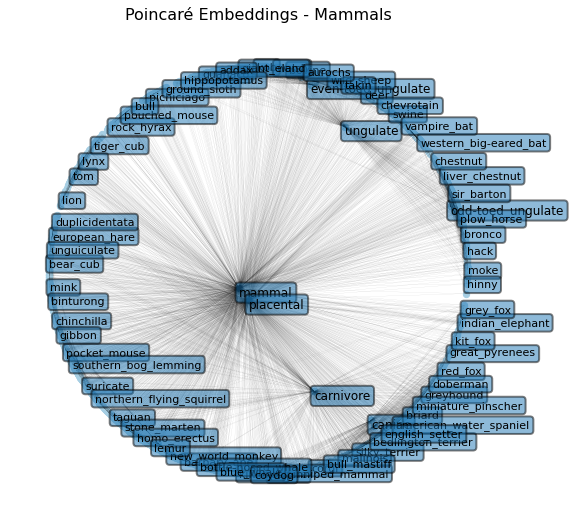

In [1]:
from visualize import *

my_new_dict = load_embedding('./mammals2D.csv')


cluster_fit = [0 for i in range(len(my_new_dict))]
node_names = list(my_new_dict.keys())
my_label_dict = {}
for i in range(len(my_new_dict)):
    my_label_dict[node_names[i]] = np.argmax(cluster_fit[i])


graph_filename = './wordnet/mammal_closure.csv'

my_graph = pandas.read_table(graph_filename, delimiter=',')


plot_embedding2D(my_new_dict, my_label_dict, my_graph, 0.001, 1, 'Poincaré Embeddings - Mammals', True, './images/mammals2D.png', True)

In [4]:
my_new_dict.values()

dict_values([array([-0.90491522,  0.42556816]), array([-0.04502018, -0.14680745]), array([-0.59180244, -0.80607059]), array([-0.57386281, -0.81856902]), array([ 0.34708392, -0.93782336]), array([ 0.53943909, -0.73654679]), array([-0.99333149,  0.11520545]), array([ 0.64210931, -0.76493611]), array([ 0.55211531, -0.7657099 ]), array([-0.21345922, -0.97694164]), array([ 0.85063444, -0.52573839]), array([ 0.26703031, -0.5946924 ]), array([ 0.42960482, -0.90300581]), array([-0.09160715, -0.08802105]), array([0.97215684, 0.23428801]), array([0.91928061, 0.31466978]), array([0.19989154, 0.97980772]), array([0.1482897 , 0.98651952]), array([ 0.79457679, -0.60714716]), array([-0.87476836,  0.4845205 ]), array([-0.86673416,  0.48171931]), array([-0.37647482, -0.92641602]), array([-0.38076137, -0.92465482]), array([0.76452927, 0.64457334]), array([ 0.20622218, -0.97849487]), array([-0.95871512, -0.28431609]), array([0.93409496, 0.35699658]), array([0.92680595, 0.3751587 ]), array([-0.98685217, -